# <b><u>Project Title : Seoul Bike Sharing Demand Prediction<u><b>

## Problem Description 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information: 

* Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importing warning for ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load dataset and overview of data

In [2]:
# Load dataset

df = pd.read_csv('D:\\Alma batter\\Capstone projects\\2-Supervised ML-Regression\\2- Bike sharing demand prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
#Making a copy of dataset for safety purpose
df_copy = df.copy()

In [4]:
# Overview of Data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
# columns in our dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#describing the data

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


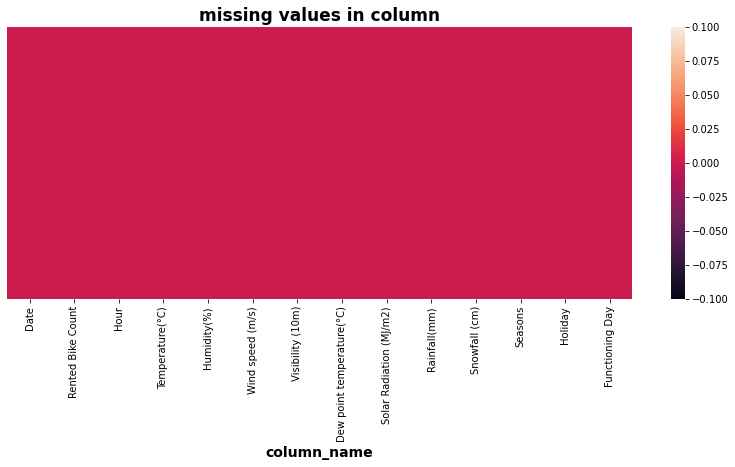

In [9]:
# Checking missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [10]:
#checking unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


### Observation: There is no missing and duplicate values in dataset

# Preprocessing

In [12]:
# finding the datatype of 'Date' column

type(df['Date'][0])

str

In [13]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : "Weekend" if x=='Saturday' or x=='Sunday' else "Weekday" )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [16]:
# Seasons present in dataset

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [17]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday


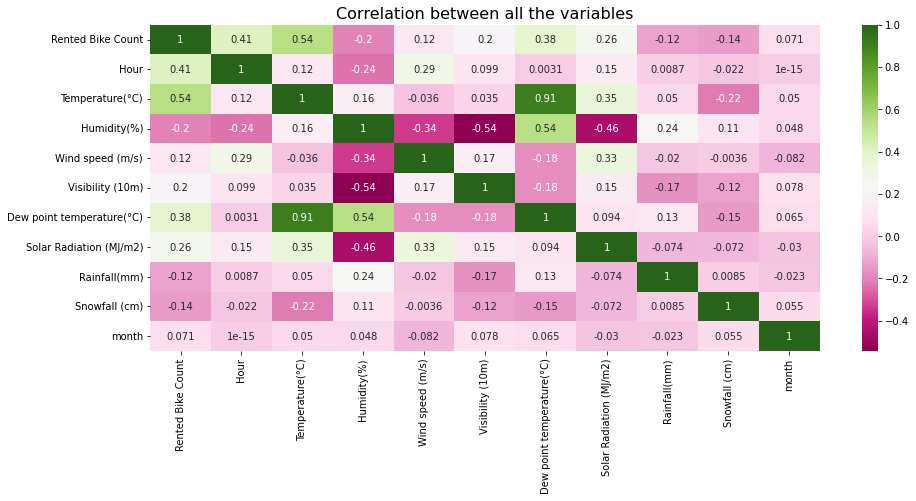

In [18]:
#checking correlation in feature using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

### Observation : As Temperature and Dew point temperature(°C) has the high correlation. we should drop this column then it do not affect the outcome of our analysis.

In [19]:
# Drop dew point temperature column

df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

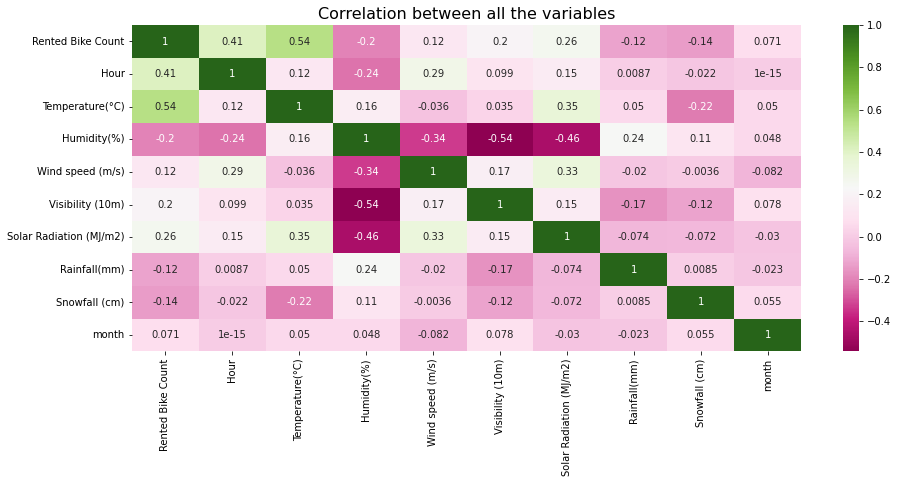

In [20]:
# Again plot correlation using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

# Performing EDA

## categorical_features

#### look at the data, Hour and month columns are a numerical columns but these are time stamp so we have to treat Hour and monthcolumn as a categorical feature

In [21]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# convert month column integer to Categorical 
df['month']=df['month'].astype('object')


In [22]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [23]:
categorical_features

,Hour,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,Weekday
1,1,Winter,No Holiday,Yes,1,Weekday
2,2,Winter,No Holiday,Yes,1,Weekday
3,3,Winter,No Holiday,Yes,1,Weekday
4,4,Winter,No Holiday,Yes,1,Weekday
...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,Weekday
8756,20,Autumn,No Holiday,Yes,11,Weekday
8757,21,Autumn,No Holiday,Yes,11,Weekday
8758,22,Autumn,No Holiday,Yes,11,Weekday


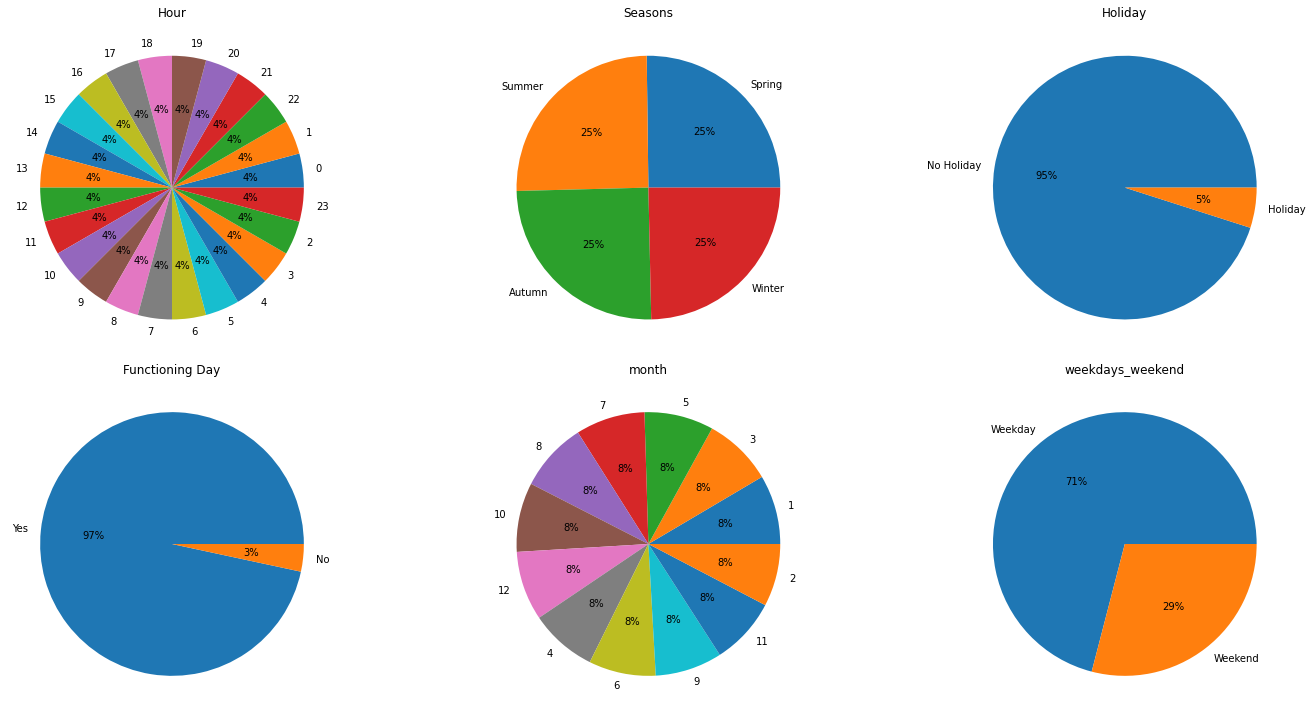

In [24]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

In [25]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  month
1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

 
column name  :  weekdays_weekend
Weekday    6216
Weekend    2544
Name: weekdays_weekend, dtype: int64


### Explore our categorical feature and Trying to take some important information from the categorical feature

Text(0.5, 1.0, 'Count of Rented bikes based on Functioning Day')

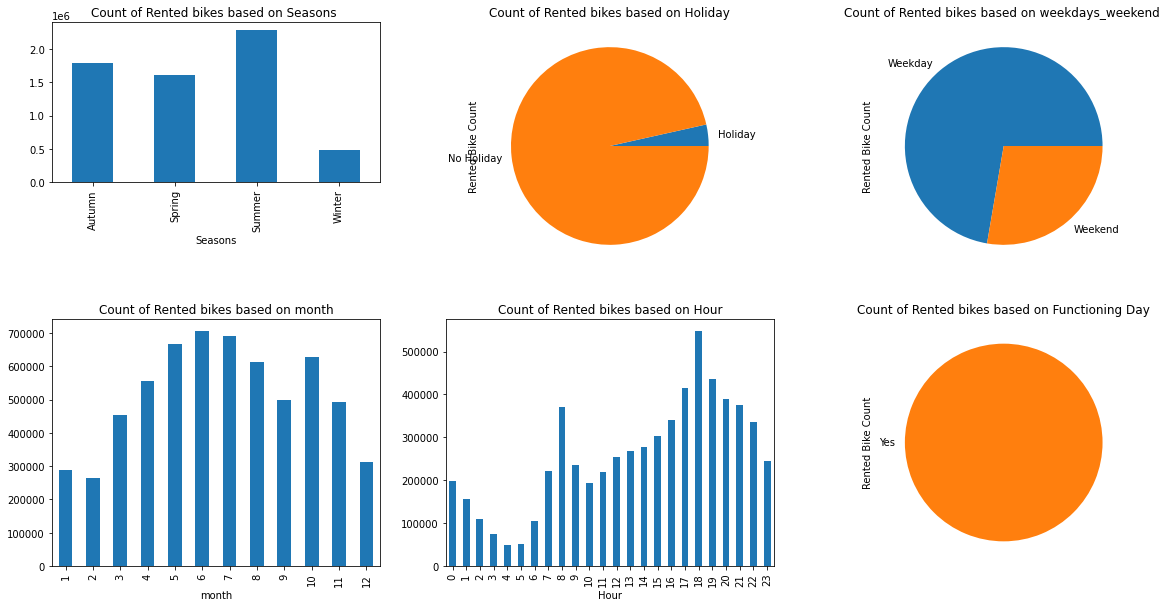

In [26]:
# Average values across each of the categorical columns 

fig = plt.figure(figsize=(20, 10))
axes = fig.add_subplot(3, 3, 1)
df_season = df.groupby('Seasons').sum()
df_season['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Seasons ')

axes = fig.add_subplot(2, 3, 2)
df_hol = df.groupby('Holiday').sum()
df_hol['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Holiday')

axes = fig.add_subplot(2, 3, 3)
df_week = df.groupby('weekdays_weekend').sum()
df_week['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on weekdays_weekend ')

axes = fig.add_subplot(2, 3, 4)
df_mon = df.groupby('month').sum()
df_mon['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on month')

axes = fig.add_subplot(2, 3, 5)
df_hour = df.groupby('Hour').sum()
df_hour['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Hour')

axes = fig.add_subplot(2, 3, 6)
df_hour = df.groupby('Functioning Day').sum()
df_hour['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Functioning Day')

### Observation: 

Most of bikes have been rented in summer followed by Autumn, Spring and Winter.

Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday'.

Most of the bikes have been rented on working days.

People generally use rented bikes during their working hours.

People use rented bike only in functioning day.

### value Counts in percentage and visualization of value counts

In [27]:
# using for loop and getting all value Counts in percentage of categorical features
for i in categorical_features.columns:
  print('feature name : ',i)
  print(df[i].value_counts(normalize=True))
  print('\n')

feature name :  Hour
0     0.041667
1     0.041667
22    0.041667
21    0.041667
20    0.041667
19    0.041667
18    0.041667
17    0.041667
16    0.041667
15    0.041667
14    0.041667
13    0.041667
12    0.041667
11    0.041667
10    0.041667
9     0.041667
8     0.041667
7     0.041667
6     0.041667
5     0.041667
4     0.041667
3     0.041667
2     0.041667
23    0.041667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  month
1     0.084932
3     0.084932
5     0.084932
7     0.084932
8     0.084932
10    0.084932
12    0.084932
4     0.082192
6     0.082192
9     0.082192
11    0.082192
2     0.076712
Name: month, dtype: float64


feature name :  week



################################################## Hour ##################################################




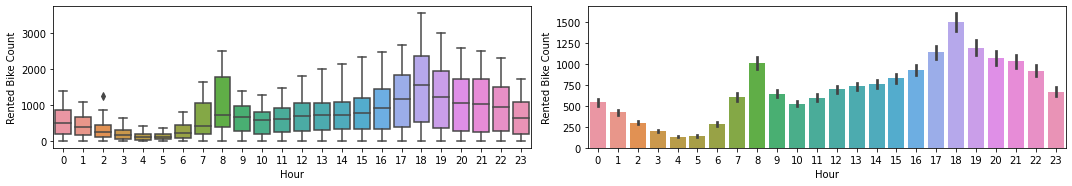



################################################## Seasons ##################################################




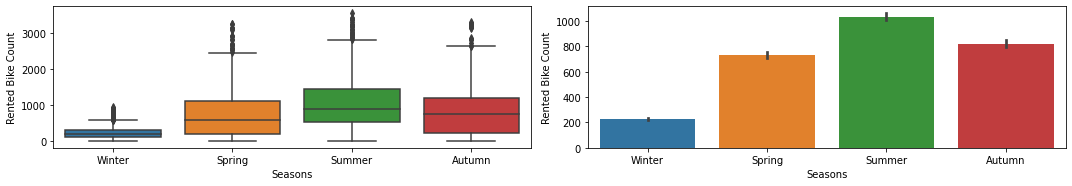



################################################## Holiday ##################################################




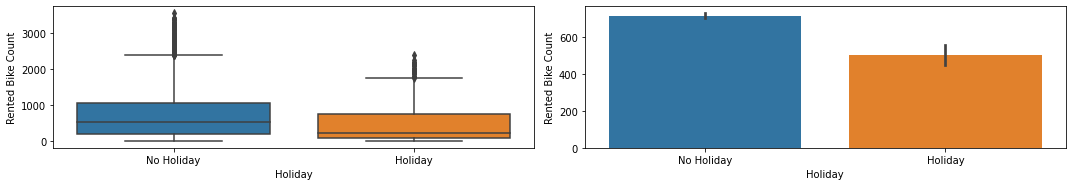



################################################## Functioning Day ##################################################




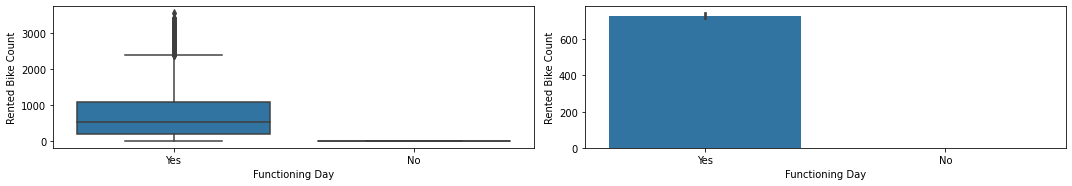



################################################## month ##################################################




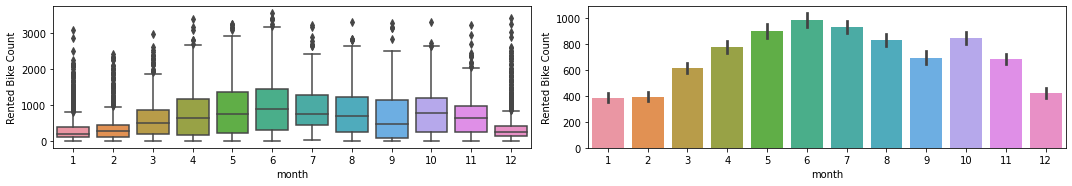



################################################## weekdays_weekend ##################################################




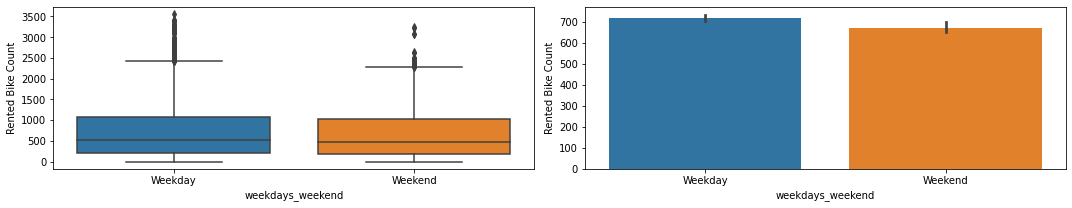

In [28]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(6,2,n)
    n+=1
    print('\n')
    print('#'*50,i,'#'*50)
    print('\n')
    sns.boxplot(x=df[i],y=df["Rented Bike Count"])
    plt.subplot(6,2,n)
    n+= 1
    sns.barplot(x=df[i],y=df['Rented Bike Count'])
    plt.tight_layout()
    plt.show()

## Numeric features

#### Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

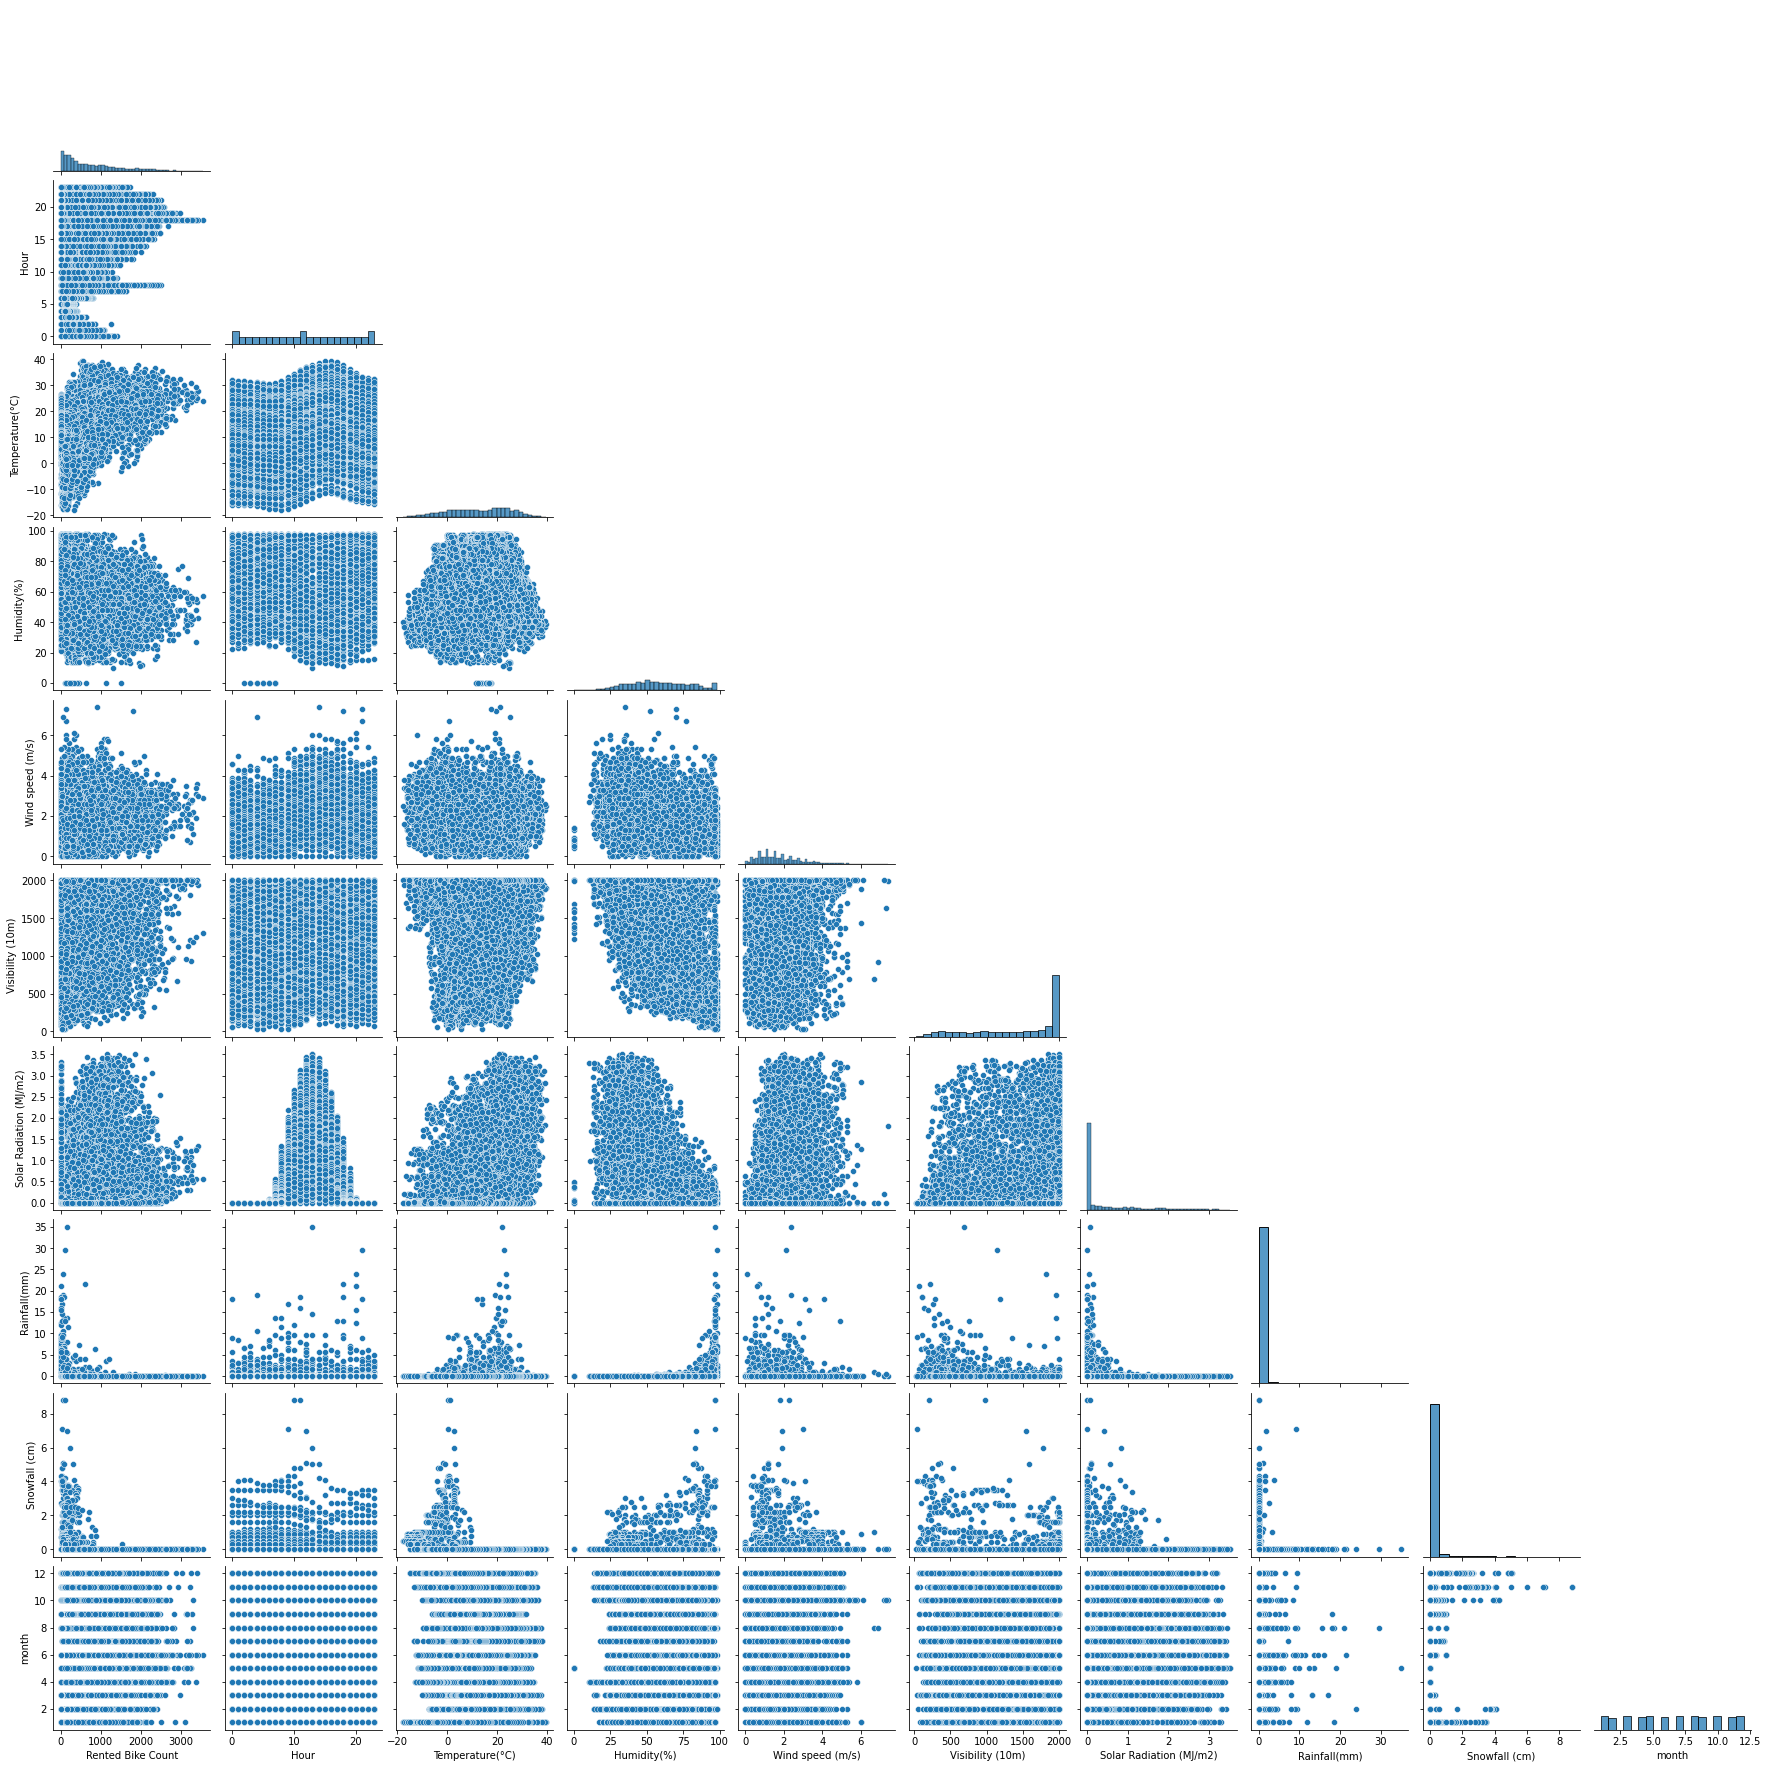

In [29]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

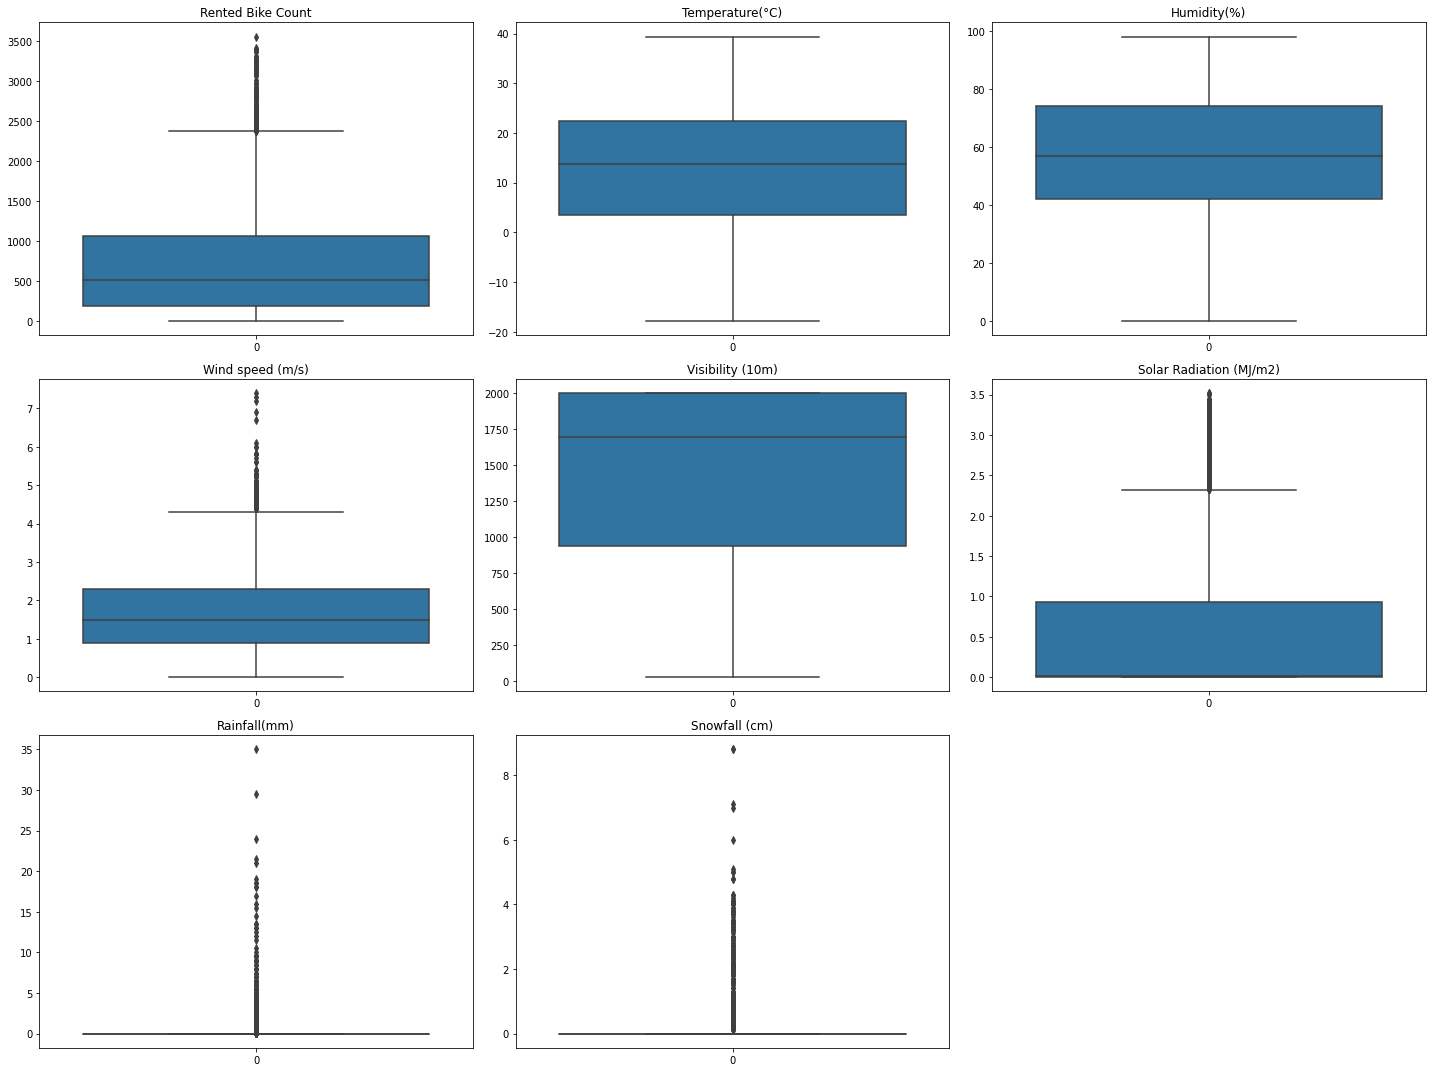

In [30]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()



################################################## Rented Bike Count ##################################################




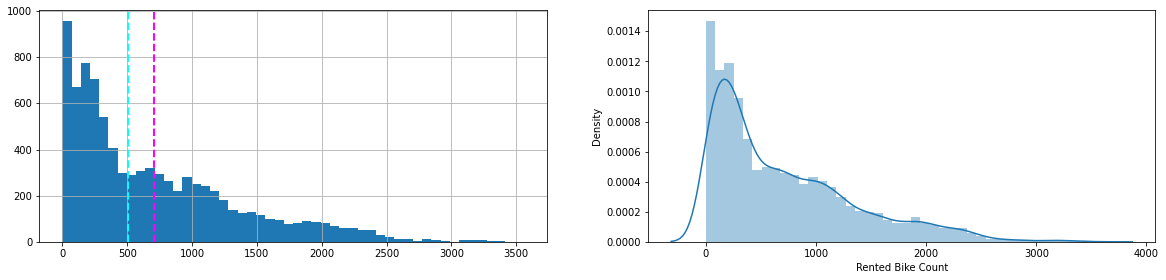



################################################## Temperature(°C) ##################################################




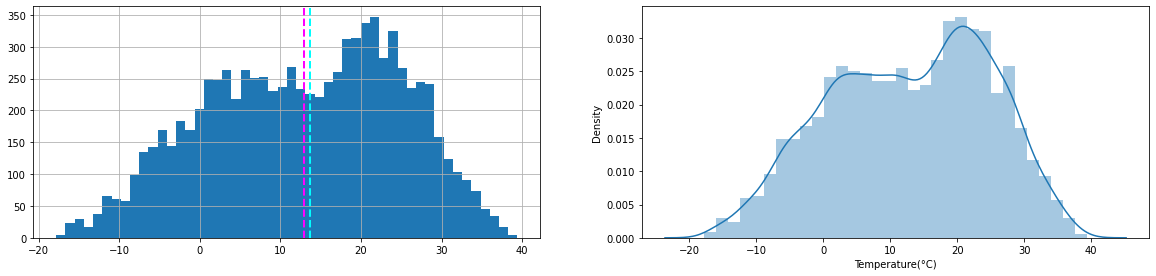



################################################## Humidity(%) ##################################################




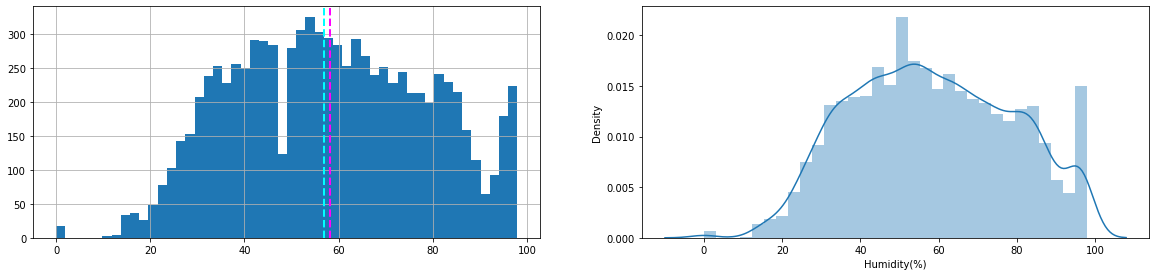



################################################## Wind speed (m/s) ##################################################




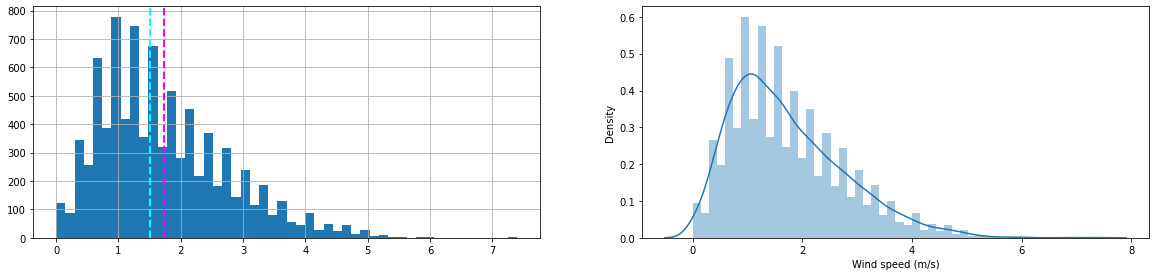



################################################## Visibility (10m) ##################################################




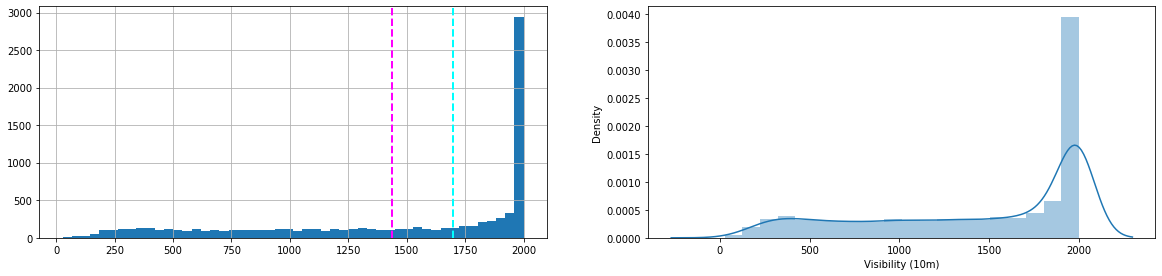



################################################## Solar Radiation (MJ/m2) ##################################################




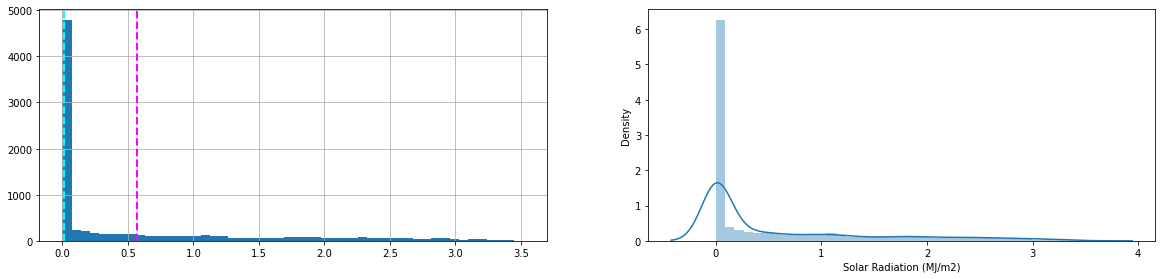



################################################## Rainfall(mm) ##################################################




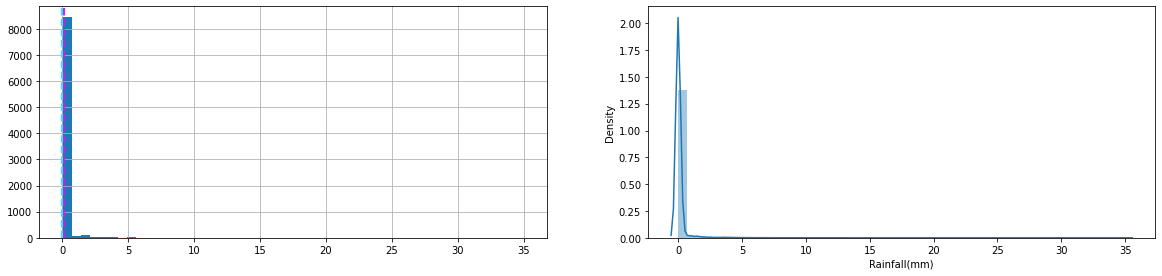



################################################## Snowfall (cm) ##################################################




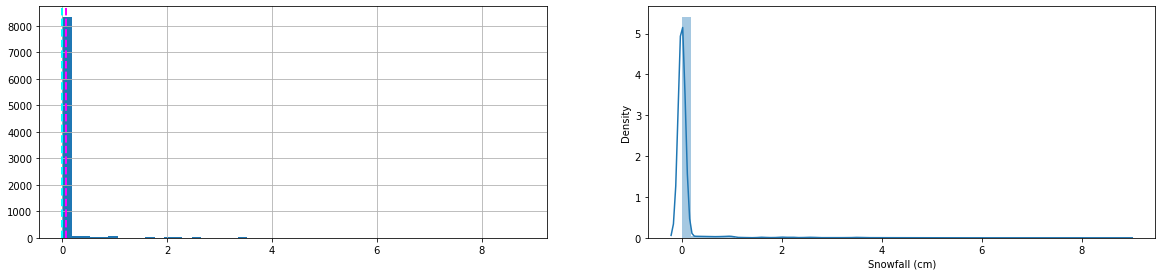

In [31]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(8,2,n)
  n+=1
  print('\n')
  print('#'*50,i,'#'*50)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(8,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


### Observation :

Most of people rented bikes when there is no or less rainfall.

Most of people rented bikes when there is no or less snowfall.

Most of people rented bikes when the temperature is between -5 to 25 degrees.

Most of people rented bikes when the visibility is between 300 to 1700.

### From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

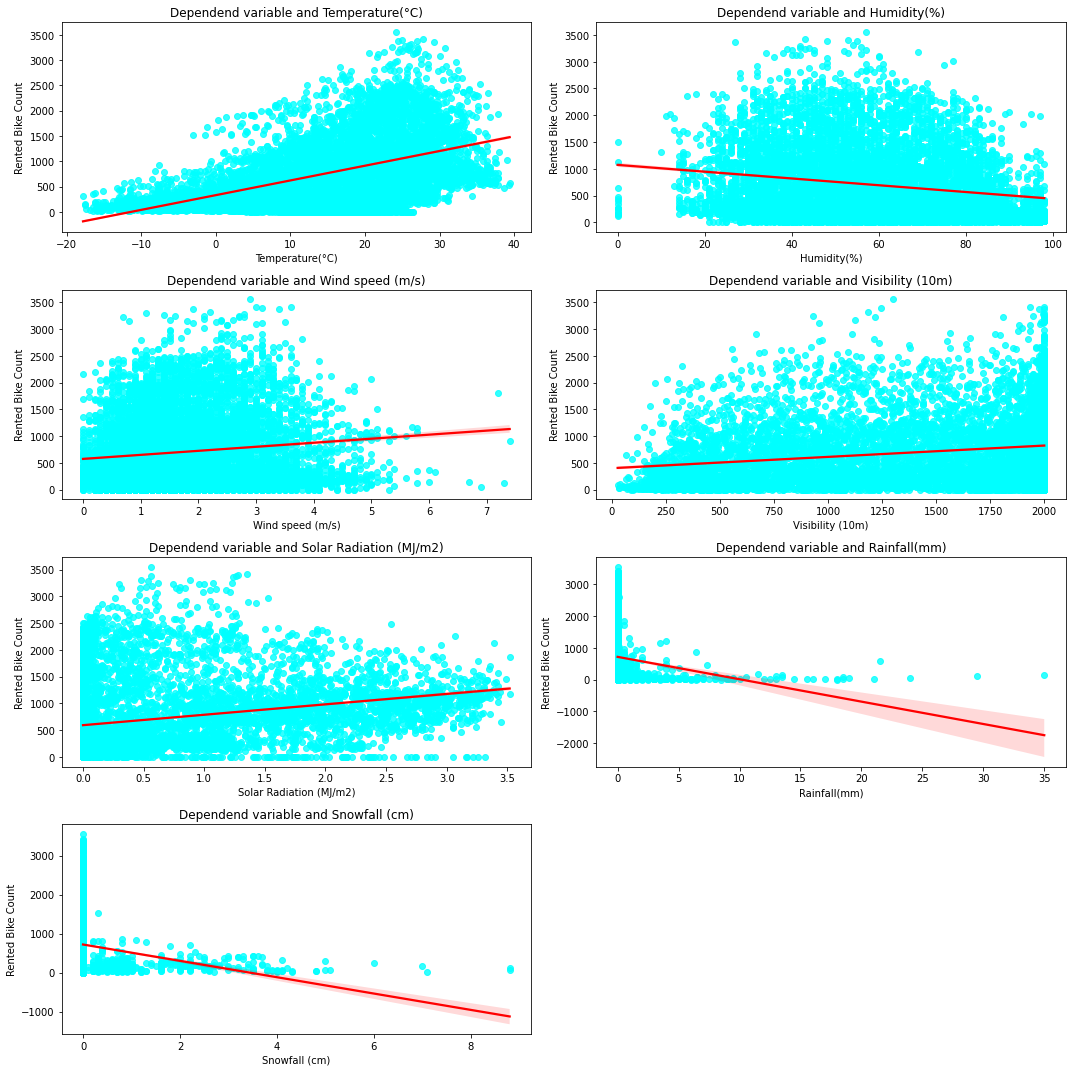

In [32]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=df[i], y=df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [35]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

ModuleNotFoundError: No module named 'patsy'

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])